Until now we have seen spatial and frequency domain simple filtering as a means to process images. We later saw how some nice properties of Fourier transform has enabled computed tomography. Then, we looked at different aspects of sampling, resampling images and saw the resulting affects of doing so, and learned how to alleviate them. 

Today, our agenda is to understand the formulation of image restoration problems. We will now see different kinds of degradations that can happen to an image and how to model them. Then, we will see a basic method to alleviate them. 

Agenda:
1. Additive noise
2. Poisson noise
3. Focal blur
4. Motion blur
5. Wiener filter for all the above degradations

In [31]:
% matplotlib inline
import numpy as np
import cv2
from PIL import Image
from scipy.signal import convolve2d as conv2d
from matplotlib import pyplot as plt

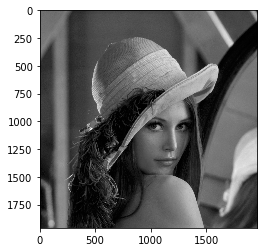

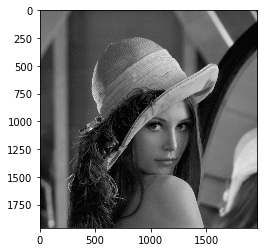

In [32]:
## Additive Gaussian Noise
image = cv2.imread('lena.jpg',0)

row,col = image.shape
mean = 0
var = 0.9
sigma = var**0.5
gauss = np.random.normal(mean,sigma,(row,col))
gauss = gauss.reshape(row,col)
noisy = image + gauss

plt.figure()
plt.imshow(image)
plt.show()

plt.figure()
plt.imshow(noisy)
plt.show()

/Users/sanketh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/Users/sanketh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


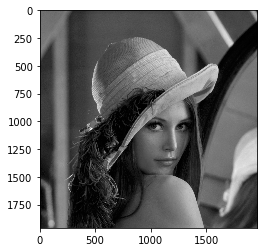

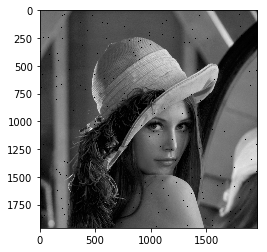

In [33]:
## Salt and Pepper Noise
row,col = image.shape
s_vs_p = 0.5
amount = 0.004
out = np.copy(image)
# Salt mode
num_salt = np.ceil(amount * image.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt))
      for i in image.shape]
out[coords] = 1

# Pepper mode
num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper))
      for i in image.shape]
out[coords] = 0

plt.figure()
plt.imshow(image)
plt.show()

plt.figure()
plt.imshow(out)
plt.show()

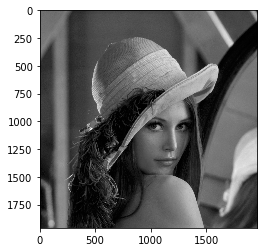

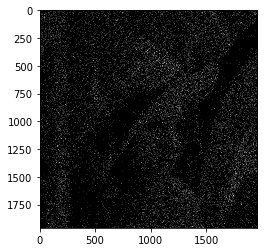

In [34]:
## Poisson noise
PEAK = 1
poiss_noisy = np.random.poisson(image / 255.0 * PEAK) / PEAK * 255  # noisy image

plt.figure()
plt.imshow(image)
plt.show()

plt.figure()
plt.imshow(poiss_noisy)
plt.show()

In [37]:
## Focal Blur

psf = np.ones((10, 10)) / 100
fc_blur = conv2d(image, psf, 'same')

plt.figure()
plt.imshow(image)
plt.show()

plt.figure()
plt.imshow(fc_blur)
plt.show()

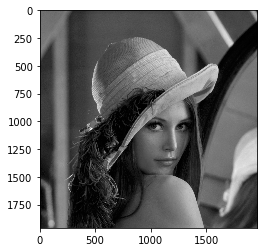

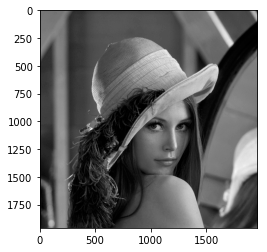

In [37]:
## Motion blur



/Users/sanketh/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


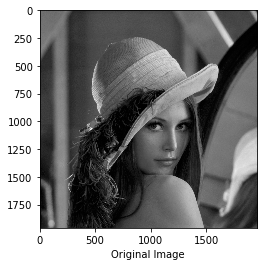

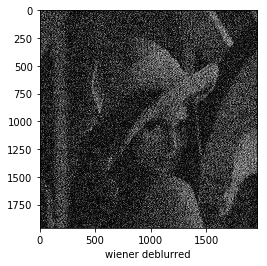

In [10]:
from PIL import Image
import matplotlib.pyplot as ppt
import numpy

def motion_process(len, size):
    sx, sy = size
    PSF = numpy.zeros((sy, sx))
    PSF[int(sy / 2):int(sy /2 + 1), int(sx / 2 - len / 2):int(sx / 2 + len / 2)] = 1
    return PSF / PSF.sum()

def make_blurred(input, PSF, eps):
    input_fft = numpy.fft.fft2(input)
    PSF_fft = numpy.fft.fft2(PSF) + eps
    blurred = numpy.fft.ifft2(input_fft * PSF_fft)
    blurred = numpy.abs(numpy.fft.fftshift(blurred))
    return blurred

def wiener(input, PSF, eps):
    input_fft = numpy.fft.fft2(input)
    PSF_fft = numpy.fft.fft2(PSF) + eps 
    result = numpy.fft.ifft2(input_fft / PSF_fft)
    result = numpy.abs(numpy.fft.fftshift(result))
    return result

image = Image.open('lena.jpg').convert('L')
ppt.figure(1)
ppt.xlabel("Original Image")
ppt.gray()
ppt.imshow(image)

ppt.figure(2)
ppt.gray()
data = numpy.asarray(image.getdata()).reshape(image.size)
PSF = motion_process(30, data.shape)
blurred = numpy.abs(make_blurred(data, PSF, 1e-3))

ppt.subplot(221)
ppt.xlabel("Motion blurred")
ppt.imshow(blurred)

result = wiener(blurred, PSF, 1e-3)
ppt.subplot(222)
ppt.xlabel("wiener deblurred")
ppt.imshow(result)

blurred += 0.1 * blurred.std() * numpy.random.standard_normal(blurred.shape)

ppt.subplot(223)
ppt.xlabel("motion & noisy blurred")
ppt.imshow(blurred)

result = wiener(blurred, PSF, )
ppt.subplot(224)
ppt.xlabel("wiener deblurred")
ppt.imshow(result)

ppt.show()